In [ ]:
import pandas as pd
from collections import *
import nltk
df = pd.read_csv('tweets-dataset.csv')


no_of_tokens = 0
c = Counter()
size_of_vocab = [0 for i in range(len(df))]
tokens_count = [0 for i in range(len(df))]



for i in range(len(df)):
   tokens = nltk.word_tokenize(df.loc[i]['Sentence'])
   no_of_tokens += len(tokens)
   counts = Counter(tokens)
   c.update(counts)
#     if(i%100 == 0):
   size_of_vocab[i] = len(c)
   tokens_count[i] = no_of_tokens
print("Number of tokens = " + str(no_of_tokens))
print("Number of types = " + str(len(c)))
print("Type to Token ratio = " + str(len(c)/no_of_tokens))


In [28]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(a)

import numpy as np
from bs4 import BeautifulSoup as bsoup
import pandas as pd
import re
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

document= pd.read_csv('tweets-dataset.csv')
#on analysing the document i.e. tweet-data, found many sentence with @, #, "" etc. Hence, first removed them

#function to clean tweet data 
def tweet_cleaner(tweet_text):
    #first remove all links i.e having html
    clean_text = bsoup(tweet_text, 'html').get_text()  
    #now split them 
    words = clean_text.split()
    # now removed words with # and @
    clean_words = [wrd for wrd in words if '@' not in wrd and '#' not in wrd] 
    #rejoined clean words to make clean document
    clean_document = ' '.join(clean_words)
    #now still there can be words with digit like amit_1999 or other special characters
    # so taking only alphabetic words
    final_clean_document = re.sub('[^a-zA-Z]+', ' ', clean_document) 
    #now we just need to normalize document before sending
    final_clean_document_r= final_clean_document.lower()
    return( final_clean_document_r )

clean_vector = np.vectorize(tweet_cleaner)

document['clear_tweet'] = clean_vector(document['Sentence'])
#document[:5] uncomment it to see the new clean data
# made a function to split words from sentence
def tweet_tokenize(s):
    return tuple(s.split())

tokens = []
for i in range(len(document)):
    tokens.extend( tweet_tokenize( document.iloc[i]['clear_tweet']) )

sorted_tokens = sorted(tokens)
word_types = list(set(tokens))
print("Number of word types:", len(word_types))
print("Number of tokens:", len(tokens))
print("Type to Token ratio = ",(len(word_types)/len(tokens)))




C:\Users\hp\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\hp\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Number of word types: 32710
Number of tokens: 303178
Type to Token ratio =  0.10789041421211301


In [42]:
import matplotlib.pyplot as plt
plt.scatter(length, frequency)

In [43]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(b) Zif's law

#from nltk.corpus import wordnet

import matplotlib.pyplot as plt
token_count = {}
for s in sorted_tokens:
    if s in token_count:
        token_count[s] += 1
    else:
        token_count[s] = 1

sorted_token_count = list(token_count.items())
sorted_token_count.sort(key=lambda x:x[1], reverse=True)

length = [len(item[0]) for item in sorted_token_count]
frequency = [item[1] for item in sorted_token_count]
plt.scatter(length, frequency)
plt.title("Zipf's law for frequency")
plt.xlabel("N")
plt.ylabel("V")

#print ("1b: f*l = "+str(param))

Text(0,0.5,'V')

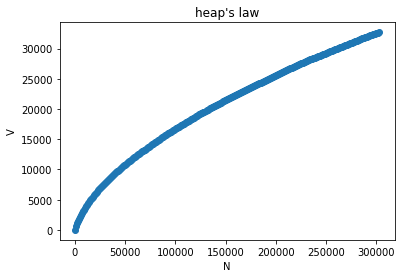

1(c): beta = 0.617289191947, K= 13.6343570238


In [3]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(c) Heap's law
#define the heap's law to be tested
def heap_law(corpus, K, beta): 
    return (corpus**beta)*K

tweet_corpus=[j for j in range(0,303178,1000)]
vocabulary=[len(set(tokens[0:j])) for j in tweet_corpus]
parameter, parameter_cov = curve_fit(heap_law, tweet_corpus, vocabulary) 

plt.scatter(tweet_corpus,vocabulary)
plt.title("heap's law")
plt.ylabel("V")
plt.xlabel("N")
plt.show()

print("1(c): beta = "+str(parameter[1])+", K= "+str(parameter[0]))

In [26]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(b) Zif's law

#from nltk.corpus import wordnet

token_count = {}
for s in sorted_tokens:
    if s in token_count:
        token_count[s] += 1
    else:
        token_count[s] = 1

sorted_token_count = list(token_count.items())
sorted_token_count.sort(key=lambda x:x[1], reverse=True)

length = [len(item[0]) for item in sorted_token_count]
frequency = [item[1] for item in sorted_token_count]


def zif_law(length, freq): 
    return freq/length
param, param_cov = curve_fit(zif_law, length, frequency)

plt.scatter(length, frequency)
plt.title("Zipf's law for frequency")
plt.xlabel("N")
plt.ylabel("V")

#print ("1b: f*l = "+str(param))


Text(0,0.5,'V')

In [ ]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(c) Heap's law


tweet_corpus=[i for i in range(0,no_of_tokens,1000)]
vocabulary=[len(set(tokens[0:i])) for i in tweet_corpus]

def test(c, K, beta): 
    return K*(c**beta)

param, param_cov = curve_fit(test, tweet_corpus, vocabulary) 

plt.scatter(tweet_corpus,vocabulary)
plt.title("Heap's law")
plt.xlabel("N")
plt.ylabel("V")
plt.show()

print("Ans-1(c): Beta = "+str(param[1])+", K= "+str(param[0]))


tokens = []
for i in range(len(data)):
    tokens.extend( tokenize( data.iloc[i]['Cleaned sentence']) )
sorted_tokens = sorted(tokens)
word_types = list(set(tokens))
print('Number of tokens:', len(tokens))



clean_document= document['clear_tweet']
no_of_tokens = 0
count = Counter()
size_of_vocabulary = [0 for i in range(len(clean_document))]
tokens_count = [0 for i in range(len(clean_document))]

for i in range(len(clean_document)):
   tokens = nltk.word_tokenize(document.loc[i]['clear_tweet'])
   no_of_tokens += len(tokens)
   counts = Counter(tokens)
   count.update(counts)
#     if(i%100 == 0):
   size_of_vocabulary[i] = len(count)
   tokens_count[i] = no_of_tokens
print("Number of tokens = " + str(no_of_tokens))
print("Number of types = " + str(len(count)))
print("Type to Token ratio = " + str(len(count)/no_of_tokens))

